In [64]:
!pip install pandoc

  Using cached pandoc-2.3.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
Using cached plumbum-1.8.2-py3-none-any.whl (127 kB)
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=e4077d7271f418fbd7803cf3304ac85a8f82e28f8e6bbd42219fd90cabec00d0
  Stored in directory: /home/romain/.cache/pip/wheels/1c/a9/c4/6254542c4e8202d52fcd69798d2507aaad1f2a4bb60f2f0fea
Successfully built pandoc


In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from brainspace.mesh.mesh_io import read_surface
from brainspace.plotting import plot_hemispheres
import pandas as pd
import seaborn as sn
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import scipy as sp

In [3]:
STUDY_DIR=os.path.join("/NAS","deathrow","protocoles","predistim")
DERIVATIVE_DIR_DIR=os.path.join(STUDY_DIR,"bids_data","derivatives")

In [4]:
# Obtenir la date actuelle
date_actuelle = datetime.now()

# Formater la date
date_formattee = date_actuelle.strftime("%Y_%m_%d_%H%M%S")

In [5]:
#with PdfPages(os.path.join(STUDY_PATH,"FAIRPARK2_R2_views.pdf")) as pdf : 
pdf=PdfPages(os.path.join(STUDY_DIR,"results","NC_CT_clusters","Analyse_NC_"+date_formattee+".pdf"))

## Carte corticales surfacique moyenne par groupe

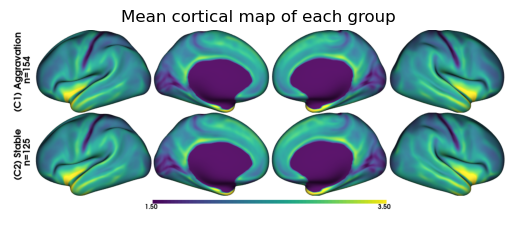

In [6]:
###########
#Chargement des surfaces
###########
lh_surface_file="/NAS/deathrow/protocoles/predistim/HCP/01025RE/MNINonLinear/fsaverage_LR32k/01025RE.L.very_inflated.32k_fs_LR.surf.gii"
lh_surface_data = read_surface(lh_surface_file, itype='gii')

rh_surface_file="/NAS/deathrow/protocoles/predistim/HCP/01025RE/MNINonLinear/fsaverage_LR32k/01025RE.R.very_inflated.32k_fs_LR.surf.gii"
rh_surface_data = read_surface(rh_surface_file, itype='gii')

###########
#Chargement de l'épaisseur corticale moyenne pour le groupe G1 PD_Anx
###########
lh_file= os.path.join(STUDY_DIR,"results","Palm_4_NC_F_CT_6","mean_G1_CT.L_sm6.func.gii")
lh_volume = [x.data for x in nib.load(lh_file).darrays] 

rh_file= os.path.join(STUDY_DIR,"results","Palm_4_NC_F_CT_6","mean_G1_CT.R_sm6.func.gii")
rh_volume = [x.data for x in nib.load(rh_file).darrays]

volumeG1 = np.concatenate([lh_volume[0],rh_volume[0]], axis=0)

###########
#Chargement de l'épaisseur corticale moyenne pour le groupe G2 PD_NonAnx
###########
lh_file= os.path.join(STUDY_DIR,"results","Palm_4_NC_F_CT_6","mean_G2_CT.L_sm6.func.gii")
lh_volume = [x.data for x in nib.load(lh_file).darrays] 

rh_file= os.path.join(STUDY_DIR,"results","Palm_4_NC_F_CT_6","mean_G2_CT.R_sm6.func.gii")
rh_volume = [x.data for x in nib.load(rh_file).darrays]

volumeG2 = np.concatenate([lh_volume[0],rh_volume[0]], axis=0)

tmp=nib.load(os.path.join(STUDY_DIR,"results","Palm_4_NC_F_CT_6","CT.L_sm6_G1.func.gii"))
n_G1=len(tmp.darrays)

tmp=nib.load(os.path.join(STUDY_DIR,"results","Palm_4_NC_F_CT_6","CT.L_sm6_G2.func.gii"))
n_G2=len(tmp.darrays)

labels = ['(C1) Aggravation \n n='+str(n_G1),'(C2) Stable \n n='+str(n_G2)]
figure_title=os.path.join(STUDY_DIR,"results","NC_CT_clusters","groupes_C1_C2.png")

#plot_hemispheres(lh_surface_data, rh_surface_data, array_name=[volumeG1,volumeG2],color_range=(1.5,3.5),size=(1200,450),label_text=labels,zoom=1.8,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False)
plot_hemispheres(lh_surface_data, rh_surface_data, array_name=[volumeG1,volumeG2],color_range=(1.5,3.5),size=figsize,label_text=labels,zoom=1.8,color_bar='bottom',share='both', embed_nb=True, interactive=True,nan_color=(0, 0, 0, 1), transparent_bg=False,screenshot=True, offscreen=True,filename=figure_title)
image = plt.imread(figure_title)
#fig=plt.figure(figsize=figsize)
fig=plt.imshow(image)
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.title('Mean cortical map of each group')
pdf.savefig()

Comparaison de groupes - PALM  - detection de cluster superieur au seuil T>1.35 (eq. p<0.05)
    permutation (non-parametrique)
    correction FWEP
    covariable age - sexe -Niveau Educatif 

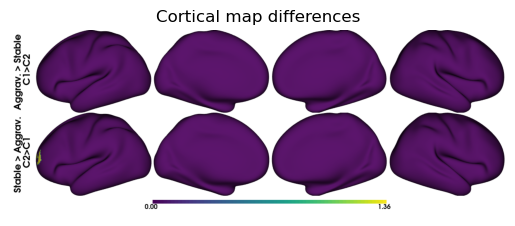

In [7]:
lh_file= '/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/results_CT_L_tfce_tstat_fwep_c1.gii'
lh_volume = [x.data for x in nib.load(lh_file).darrays] 

rh_file= '/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/results_CT_R_tfce_tstat_fwep_c1.gii'
rh_volume = [x.data for x in nib.load(rh_file).darrays]

volume_c1 = np.concatenate([lh_volume[0],rh_volume[0]], axis=0)
volume_c1[volume_c1<1.3]=0

lh_file= '/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/results_CT_L_tfce_tstat_fwep_c2.gii'
lh_volume = [x.data for x in nib.load(lh_file).darrays] 

rh_file= '/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/results_CT_R_tfce_tstat_fwep_c2.gii'
rh_volume = [x.data for x in nib.load(rh_file).darrays]

volume_c2 = np.concatenate([lh_volume[0],rh_volume[0]], axis=0)
volume_c2[volume_c2<1.3]=0

labels = ['Aggrav. > Stable \n C1>C2','Stable > Aggrav. \n C2>C1']

figure_title=os.path.join(STUDY_DIR,"results","NC_CT_clusters","Vs_C1_C2.png")
#plot_hemispheres(lh_surface_data, rh_surface_data, array_name=array_name=[volumeG1,volumeG2])
plot_hemispheres(lh_surface_data, rh_surface_data, array_name=[volume_c1,volume_c2],size=(1200, 450),label_text=labels,zoom=1.8,color_bar='bottom',share='both',embed_nb=True,interactive=True,nan_color=(0, 0, 0, 1),transparent_bg=False,screenshot=True, offscreen=True,filename=figure_title)
image = plt.imread(figure_title)
fig=plt.imshow(image)
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.title('Cortical map differences')
pdf.savefig()

Caractérisation du cluster.
Volume :

In [8]:
#commande pour créer le cluster
#wb_command -metric-find-clusters /NAS/dumbo/protocoles/FAIRPARKII/HCP/sub_703013AA_ses_W00/MNINonLinear/fsaverage_LR32k/sub_703013AA_ses_W00.L.very_inflated.32k_fs_LR.surf.gii  /NAS/deathrow/protocoles/predistim/results/Palm_4_NC_10000_CT_10/results_CT_L_tfce_tstat_fwep_c2.gii 1.3 10 /NAS/deathrow/protocoles/predistim/results/Palm_4_NC_10000_CT_10/results_CT_L_tfce_tstat_fwep_c2_clusters.gii -corrected-areas /NAS/deathrow/protocoles/predistim/results/Palm_4_NC_10000_CT_10/L_area.func.gii
#from nilearn.connectome import ConnectivityMeasures
ind=np.where(lh_volume[0]>1.3)
file='/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/L_area.func.gii'
tmp=nib.load(file)
np.sum(tmp.darrays[0].data[ind[0]])

629.6002

## Affichage des distributions (par patient) des épaisseurs corticales moyenne dans le cluster 

nG1 =  154
nG2 =  125


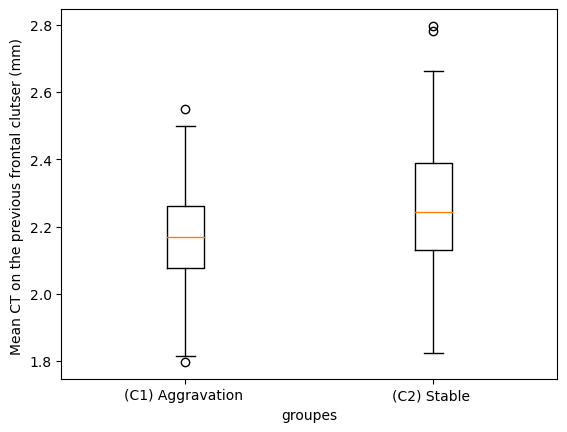

In [9]:
ind=np.where(volume_c2>1.3)
G1_mes=[];G2_mes=[]
lh_file='/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/CT.L_sm6_G1.func.gii'
lh_volume = [x.data for x in nib.load(lh_file).darrays] 

rh_file='/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/CT.R_sm6_G1.func.gii'
rh_volume = [x.data for x in nib.load(rh_file).darrays]

print("nG1 = ",len(lh_volume))
for lh,rh in zip(lh_volume,rh_volume) :
    volume_G1 = np.concatenate([lh,rh], axis=0)
    G1_mes.append(np.mean(volume_G1[ind[0]]))

lh_file='/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/CT.L_sm6_G2.func.gii'
lh_volume = [x.data for x in nib.load(lh_file).darrays] 

rh_file='/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/CT.R_sm6_G2.func.gii'
rh_volume = [x.data for x in nib.load(rh_file).darrays]

print("nG2 = ",len(lh_volume))
for lh,rh in zip(lh_volume,rh_volume) :
    volume_G2 = np.concatenate([lh,rh], axis=0)
    G2_mes.append(np.mean(volume_G2[ind[0]]))
    
fig=plt.boxplot([G1_mes, G2_mes])
plt.ylabel('Mean CT on the previous frontal clutser (mm) ')
plt.xlabel('groupes')
plt.xticks([1, 2], ['(C1) Aggravation ', '(C2) Stable '])
pdf.savefig()
plt.show()

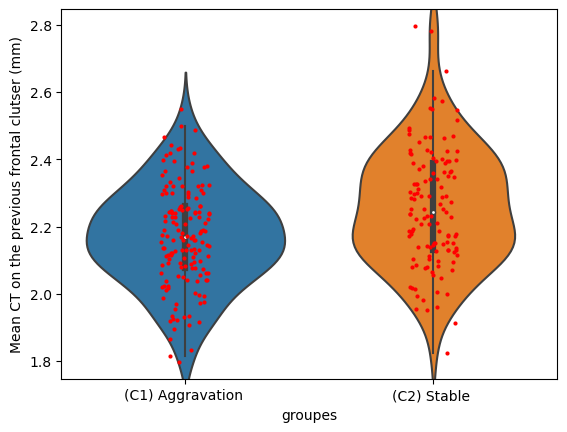

In [10]:
data = {'groupes': np.concatenate((np.ones(len(G1_mes)), np.ones(len(G2_mes)) * 2)), 'valeur':np.concatenate((G1_mes, G2_mes))}
df = pd.DataFrame(data)
sn.violinplot(df,y="valeur",x="groupes",split=True)
sn.stripplot(df,y="valeur",x="groupes",size=3,color="red")
plt.ylabel('Mean CT on the previous frontal clutser (mm)')
plt.xlabel('groupes')
plt.xticks([0, 1], ['(C1) Aggravation ', '(C2) Stable '])
pdf.savefig()

In [11]:
test.darrays[0].metadata.get('Name')[:2]

NameError: name 'test' is not defined

In [13]:
sites=[]
mes=[]
ind=np.where(volume_c2>0)
lh_file= '/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/CT.L_sm6.func.gii'
lh_vols=nib.load(lh_file) 

rh_file= '/NAS/deathrow/protocoles/predistim/results/Palm_4_NC_F_CT_6/CT.R_sm6.func.gii'
rh_vols=nib.load(rh_file) 

for lh_vol,rh_vol in zip(lh_vols.darrays,rh_vols.darrays):
    sites.append(lh_vol.metadata.get('Name')[:2])
    volume = np.concatenate([lh_vol.data,rh_vol.data], axis=0)
    mes.append(np.mean(volume[ind[0]]))

data = {'site': sites, 'valeur':mes}
df = pd.DataFrame(data)

In [14]:
pdf.close() 

AttributeError: 'NoneType' object has no attribute 'finalize'

In [ ]:
sn.violinplot(df,y="valeur",x="site",split=True)
sn.stripplot(df,y="valeur",x="site",size=3)
plt.ylabel('Mean CT on the previous frontal clutsern (mm)')
plt.xlabel('Acquistion center')
pdf.savefig()

In [ ]:
len(Site9)

In [ ]:

Site1=df[df["site"]=="01"]["valeur"]
Site2=df[df["site"]=="02"]["valeur"]
Site4=df[df["site"]=="04"]["valeur"]
Site5=df[df["site"]=="05"]["valeur"]
Site6=df[df["site"]=="06"]["valeur"]
Site7=df[df["site"]=="07"]["valeur"]
Site8=df[df["site"]=="08"]["valeur"]
Site9=df[df["site"]=="09"]["valeur"]
Site10=df[df["site"]=="10"]["valeur"]
Site11=df[df["site"]=="11"]["valeur"]
Site13=df[df["site"]=="13"]["valeur"]
Site14=df[df["site"]=="14"]["valeur"]
Site15=df[df["site"]=="15"]["valeur"]
Site17=df[df["site"]=="17"]["valeur"]
Site18=df[df["site"]=="18"]["valeur"]
Site19=df[df["site"]=="19"]["valeur"]
Site20=df[df["site"]=="20"]["valeur"]
print(len(Site1),len(Site2),len(Site4),len(Site5))
#Site10,Site13
stat_val,p_val=sp.stats.f_oneway(Site1,Site2,Site5,Site6,Site7,Site8,Site9,Site11,Site14,Site15,Site17,Site18,Site19,Site20)
print(stat_val,p_val)
#outliers = np.where(new_df["R2"] > 250)

In [ ]:
stat_val,p_val=sp.stats.f_oneway(Site5,Site2,Site7)
print(stat_val,p_val)

In [ ]:
stat_val,p_val=sp.stats.f_oneway(Site19,Site4,Site6,Site1,Site13)
print(stat_val,p_val)

In [ ]:
stat_val,p_val=sp.stats.f_oneway(Site02,Site05)
print(stat_val,p_val)